# Importing libraries and loading + getting basic information about the dataset

## Imoporting libraries and loading dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('commute_time.csv')

## Getting basic information about the dataset

In [50]:
df.head()

,Age,Gender,Major,Distance (km),Mode of Transportation,Traffic,Commute Time (min)
0,25,Male,CSE,11.0,Bus,High,200.0
1,25,Male,CSE,2.0,Walk,Low,20.0
2,25,Male,CSE,4.0,Bus,Medium,120.0
3,24,Female,CSE,4.3,Bus,High,120.0
4,25,Male,CSE,6.0,Bus,Medium,65.0


In [51]:
df.columns

Index(['Age', 'Gender', 'Major', 'Distance (km)', 'Mode of Transportation',
       'Traffic', 'Commute Time (min)'],
      dtype='object')

In [52]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1107 non-null   int64  
 1   gender                  1107 non-null   object 
 2   major                   1106 non-null   object 
 3   distance_(km)           1107 non-null   float64
 4   mode_of_transportation  1098 non-null   object 
 5   traffic                 1106 non-null   object 
 6   commute_time_(min)      1105 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 60.7+ KB


Missing Data Count: 
age                       0
gender                    0
major                     1
distance_(km)             0
mode_of_transportation    9
traffic                   1
commute_time_(min)        2
dtype: int64


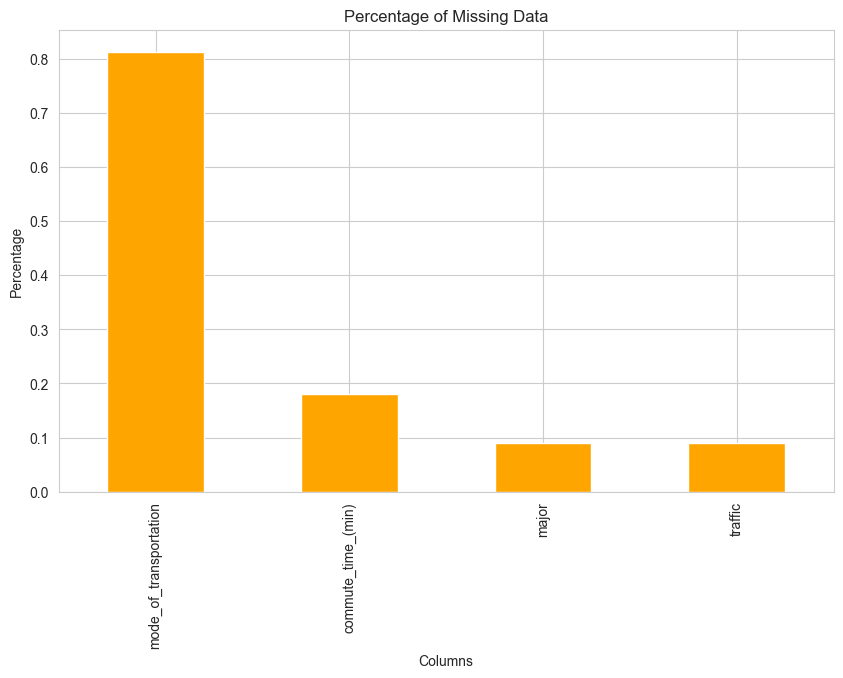

In [53]:
print("Missing Data Count: ")
print(df.isnull().sum())
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='orange')
plt.title("Percentage of Missing Data")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()


Looks like there are some missing values in the dataset. We will handle the missing values in the next section.

# Data Processing

## Handling missing values

In [54]:
categorical_columns = ['major','gender']

def update_missing_transportation(df):
    df.loc[df['mode_of_transportation'].isnull() & (df['distance_(km)'] <= 1.5), 'mode_of_transportation'] = 'Walk'
    df.loc[df['mode_of_transportation'].isnull() & (df['distance_(km)'] > 1.5) & (df['distance_(km)'] <= 2), 'mode_of_transportation'] = 'Rickshaw'
    df.loc[df['mode_of_transportation'].isnull() & (df['distance_(km)'] > 2), 'mode_of_transportation'] = 'Bus'
    return df

df = update_missing_transportation(df)
df['mode_of_transportation'] = df['mode_of_transportation'].str.lower()
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

There are 4 columns which have missing values. The major and gender columns are categorical and can be filled with the mode value of their respective columns. But for mode_of_transportation the imputation function written with general logic about the domain.

In [55]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 50
Number of duplicate rows: 0


In [56]:
df.dropna(inplace=True)

There are 50 duplicate rows so they are dropped and also columns missing commute_time_(min) are dropped.

# Univariate Analysis

In [57]:
# Age distribution
fig = px.histogram(df, x='age', nbins=10, title='Age Distribution', color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis_title='Age', yaxis_title='Count',bargap=0.1)
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


The age column ranges from age 15 to 64. One thing to note is that most of the people present in the age column are of 25-29 age group with a count of 503. The second highest age group is 20-24 with a count of 386 people in it. People with lowest count is the age group 60-64 with a count of 2. Other age groups have people ranging from 4 to 49.

In [58]:
# Gender Distribution: Pie Chart
fig = px.pie(df, names='gender', title='Gender Distribution', color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive

It is seen from the pie chart that there are more males than females in the dataset. 61.6% of the total data are of males. Minority class is other.

In [59]:
# Major Distribution: Bar Chart
df['major'] = df['major'].replace({
    'CSE': 'CSE',
    'Computer Science': 'CSE',
    'Computer Science & Engineering': 'CSE',
    'IT': 'CSE',
    'CS': 'CSE',
    'BBA': 'Business',
    'Agricultural': 'Agriculture',
    'BSAg': 'Agriculture',
    'Law' : 'Arts',
    'English' : 'Arts',
    'Economics' : 'Arts',
    'Social Work' : 'Arts',
    'Ag': 'Agriculture',
    'CE' : 'Engineering',
    'GE' : 'Engineering',
    'IPE': 'Engineering',
    'nuclear engineering': 'Engineering',
    'Bsag': 'Agriculture',
    'ME' : 'Engineering',
    'Bss': 'Arts',
    'BA' : 'Arts',
})
df["major"] = df["major"].str.strip()
majors_to_drop = ['Other', 'Agricultural', 'BSAg', 'Physics', 'URP', 'Chemistry', 'MBBS',"Education"]
df = df[~df['major'].isin(majors_to_drop)]

fig = px.bar(df['major'].value_counts().reset_index(), x='major', y='count',
             color='major', title='Distribution of Students by Major', labels={'count': 'Count', 'major': 'Major'})
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


Majority of people present in the dataset have CSE as their major with a count of 562 followed by EEE(202) and Engineering(109). The least people belong to the Agriculture major which has a count of 10.

In [60]:
# Distance Distribution: Histogram
fig = px.histogram(df, x='distance_(km)', nbins=15, title='Distance Distribution (in km)', 
                   color_discrete_sequence=['lightgreen'])
fig.update_layout(xaxis_title='Distance (km)', yaxis_title='Frequency', bargap=0.1)
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


This histogram gives a very interesting insight about the  distance distribution in the dataset. Most of the people in the dataset live from 0 to 12 kilometers distance from their office location, specifically in distance 2.5-7.4 kilometers with a count of 396. Second highest group of people in the dataset belong to 7.5-12.4 kilometers distance from their office location with a count of 330. There are very less amount of people in the dataset whole live too much far away from their office location(47.5-52.4 kilometers).

In [61]:
# Mode of Transportation: Bar Chart
df["mode_of_transportation"] = df["mode_of_transportation"].str.strip()
df['mode_of_transportation'] = df['mode_of_transportation'].replace({
    'autorickshaw' : 'rickshaw',
    'autoricshaw' : 'rickshaw',
    'riskha' : 'rickshaw',
    'cycle' : 'bike'
})
columns_to_drop = ['bicycle']
df = df[~df['mode_of_transportation'].isin(columns_to_drop)]
mode_counts = df['mode_of_transportation'].value_counts().reset_index()
mode_counts.columns = ['mode_of_transportation', 'count']
fig = px.bar(mode_counts, 
             x='mode_of_transportation', 
             y='count', 
             color='mode_of_transportation', 
             title='Mode of Transportation Distribution', 
             labels={'mode_of_transportation': 'Mode of Transportation', 'count': 'Count'})
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive

Most people use bus as their primary mode of transportation. In the bar plot it is seen that people using bus as their primary mode of transportation has count of 461. Car has 2nd position here with a count of 208. People using rickshaw has count 40 which is the lowest.

In [62]:
# Traffic Conditions: Bar Chart
mode_counts = df['traffic'].value_counts().reset_index()
mode_counts.columns = ['traffic', 'count']
fig = px.bar(mode_counts, x='traffic', y='count', 
             color='traffic', title='Traffic Conditions Distribution', labels={'index': 'Traffic', 'traffic': 'Count'})
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


Very surprising that each class of the traffic condition has almost similar counts. Here it means that the classes are balanced.

In [63]:
# Commute Time: Histogram
df = df[df["commute_time_(min)"] <= 300]
fig = px.histogram(df, x='commute_time_(min)', nbins=20, title='Commute Time Distribution',
                   color_discrete_sequence=['coral'])
fig.update_layout(xaxis_title='Commute Time (minutes)', yaxis_title='Frequency',bargap=0.1)
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive

The commute time has a very large range of values. IT is seen from the plot that for most of the people(164) it takes 20-39.9 minutes travel from and to office-home. if i consider cumulative time then 0-250 minutes is the range of time that most of the people have. there aren't a lot of people who have time >250 minutes.

# Bivariate Analysis

In [64]:
# Commute Time vs Distance Scatter Plot
fig = px.scatter(df, x='distance_(km)', y='commute_time_(min)', color='traffic',
                 title='Commute Time vs Distance (by Traffic Conditions)',
                 labels={'distance_(km)': 'Distance (km)', 'commute_time_(min)': 'Commute Time (minutes)'},
                 hover_data=['mode_of_transportation'])
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


It is seen from the scatter plot that low traffic causes less commute time but high traffic causes more commute time in general.Records with medium traffic intensity has commute time somewhere between the high and low traffic. However, its not always the case there are many exceptions also present in the plot.

In [65]:
# Box Plot: Commute Time by Mode of Transportation
fig = px.box(df, x='mode_of_transportation', y='commute_time_(min)', 
             color='mode_of_transportation', title='Commute Time by Mode of Transportation',
             labels={'commute_time_(min)': 'Commute Time (minutes)'})
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive

In [66]:
import pandas as pd

def remove_outliers_iqr_specific_value(df, numeric_column, mode_column, mode_value):
    filtered_df = df[df[mode_column] == mode_value]

    Q1 = filtered_df[numeric_column].quantile(0.25)
    Q3 = filtered_df[numeric_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    non_outliers = filtered_df[(filtered_df[numeric_column] >= lower_bound) & (filtered_df[numeric_column] <= upper_bound)]

    df = pd.concat([df[df[mode_column] != mode_value], non_outliers])
    return df


df = remove_outliers_iqr_specific_value(df,'commute_time_(min)','mode_of_transportation','walk')
df = remove_outliers_iqr_specific_value(df,'commute_time_(min)','mode_of_transportation','bike')
df = remove_outliers_iqr_specific_value(df,'commute_time_(min)','mode_of_transportation','rickshaw')
df = remove_outliers_iqr_specific_value(df,'commute_time_(min)','mode_of_transportation','bus')
df = remove_outliers_iqr_specific_value(df,'commute_time_(min)','mode_of_transportation','car')

People who use bus as their mode of transport has highest median of commute time(115.5 minutes). and people who use rickshaw and take walk to their office have lowest value of median  which is 30 minutes. 2nd lowest value of median occurs in the bike mode of transport whuch has median of 68.5. Car has 2nd highest value of median which is 90 minutes. It can be infered that people who uses car and bus takes more time to commute in general.

In [67]:
# Box Plot: Commute Time by Traffic Conditions
fig = px.box(df, x='traffic', y='commute_time_(min)', color='traffic', 
             title='Commute Time by Traffic Conditions',
             labels={'commute_time_(min)': 'Commute Time (minutes)', 'traffic': 'Traffic Conditions'})
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


It was also visualized in the scatter plot above but this shows the speicfic values of median for each traffic condition. People who encounter high traffic conditions has a mean time of 120 minutes followed by medium(82.8 minutes) and low(45.7 minutes). This shows that traffic conditions have a impact on the commute time and it is clearly visible.

In [68]:
df = remove_outliers_iqr_specific_value(df,'commute_time_(min)','traffic','High')
df = remove_outliers_iqr_specific_value(df,'commute_time_(min)','traffic','Medium')
df = remove_outliers_iqr_specific_value(df,'commute_time_(min)','traffic','Low')

In [69]:
# Pairwise Relationships (Numerical Features)
numerical_cols = ['age', 'distance_(km)', 'commute_time_(min)']
fig = px.scatter_matrix(df, dimensions=numerical_cols, color='traffic', title='Pairwise Relationships Between Numerical Features')
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive

It is clear that high traffic has more commute time in general.

# Multivariate Analysis

In [70]:
# Group by major and mode of transportation
grouped_data = df.groupby(['major', 'mode_of_transportation'])['commute_time_(min)'].mean().reset_index()

# Grouped bar chart
fig = px.bar(grouped_data, 
             x='major', 
             y='commute_time_(min)', 
             color='mode_of_transportation',
             barmode='group',
             title='Average Commute Time by Major and Mode of Transportation')
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


people of all majors have the most commute time in average using bus mode of transportation but this isnt true for Biology,Mathematics and Engineering majors.

In [71]:
# Group by major and gender and calculate mean commute time
grouped_major_gender = df.groupby(['major', 'gender'])['commute_time_(min)'].mean().reset_index()
fig = px.bar(grouped_major_gender, 
             x='major', 
             y='commute_time_(min)', 
             color='gender',
             barmode='group',
             title='Average Commute Time by Major and Gender')
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


people who are female has more commute time than men in general. again, this analysis is also not true for the people of mathematics majors. on the other hand, females of eee and engineering majors have mor commute time than men. All values aof commute time doesn't differ too much significantly except for Mathematics class. Other class has more commute time in Biology major.

In [72]:
# Group by major and calculate total commute time
grouped_major_time = df.groupby('major')['commute_time_(min)'].mean().reset_index()
fig = px.bar(grouped_major_time, 
             x='major', 
             y='commute_time_(min)',
             title='Average Commute Time by Major',
             color='commute_time_(min)',
             color_continuous_scale='Viridis')
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive

people from all majors have close average mean commute time but for math majors the time is  lower than other majors and EEE is much higher.

In [73]:
# Grouped Bar Chart: Commute Time by Mode of Transportation and Traffic
fig = px.bar(df, x='mode_of_transportation', y='commute_time_(min)', color='traffic',
             barmode='group', title='Commute Time by Mode of Transportation and Traffic Conditions',
             labels={'commute_time_(min)': 'Commute Time (minutes)', 'mode_of_transportation': 'Mode of Transportation'})
fig.show()  #for notebook
#fig.show("png") #for github it only supports non interactive


People who walk to their office or take rickshaw aren't affected much by traffic conditions. they get low traffic most of the time. on the other hand, people who take bus,car  has significant total commute time than people who take rickshaw and walk to their office. but the total time of bus in all cases is more every other mode of transportation. And rickshaw has the least commute time.

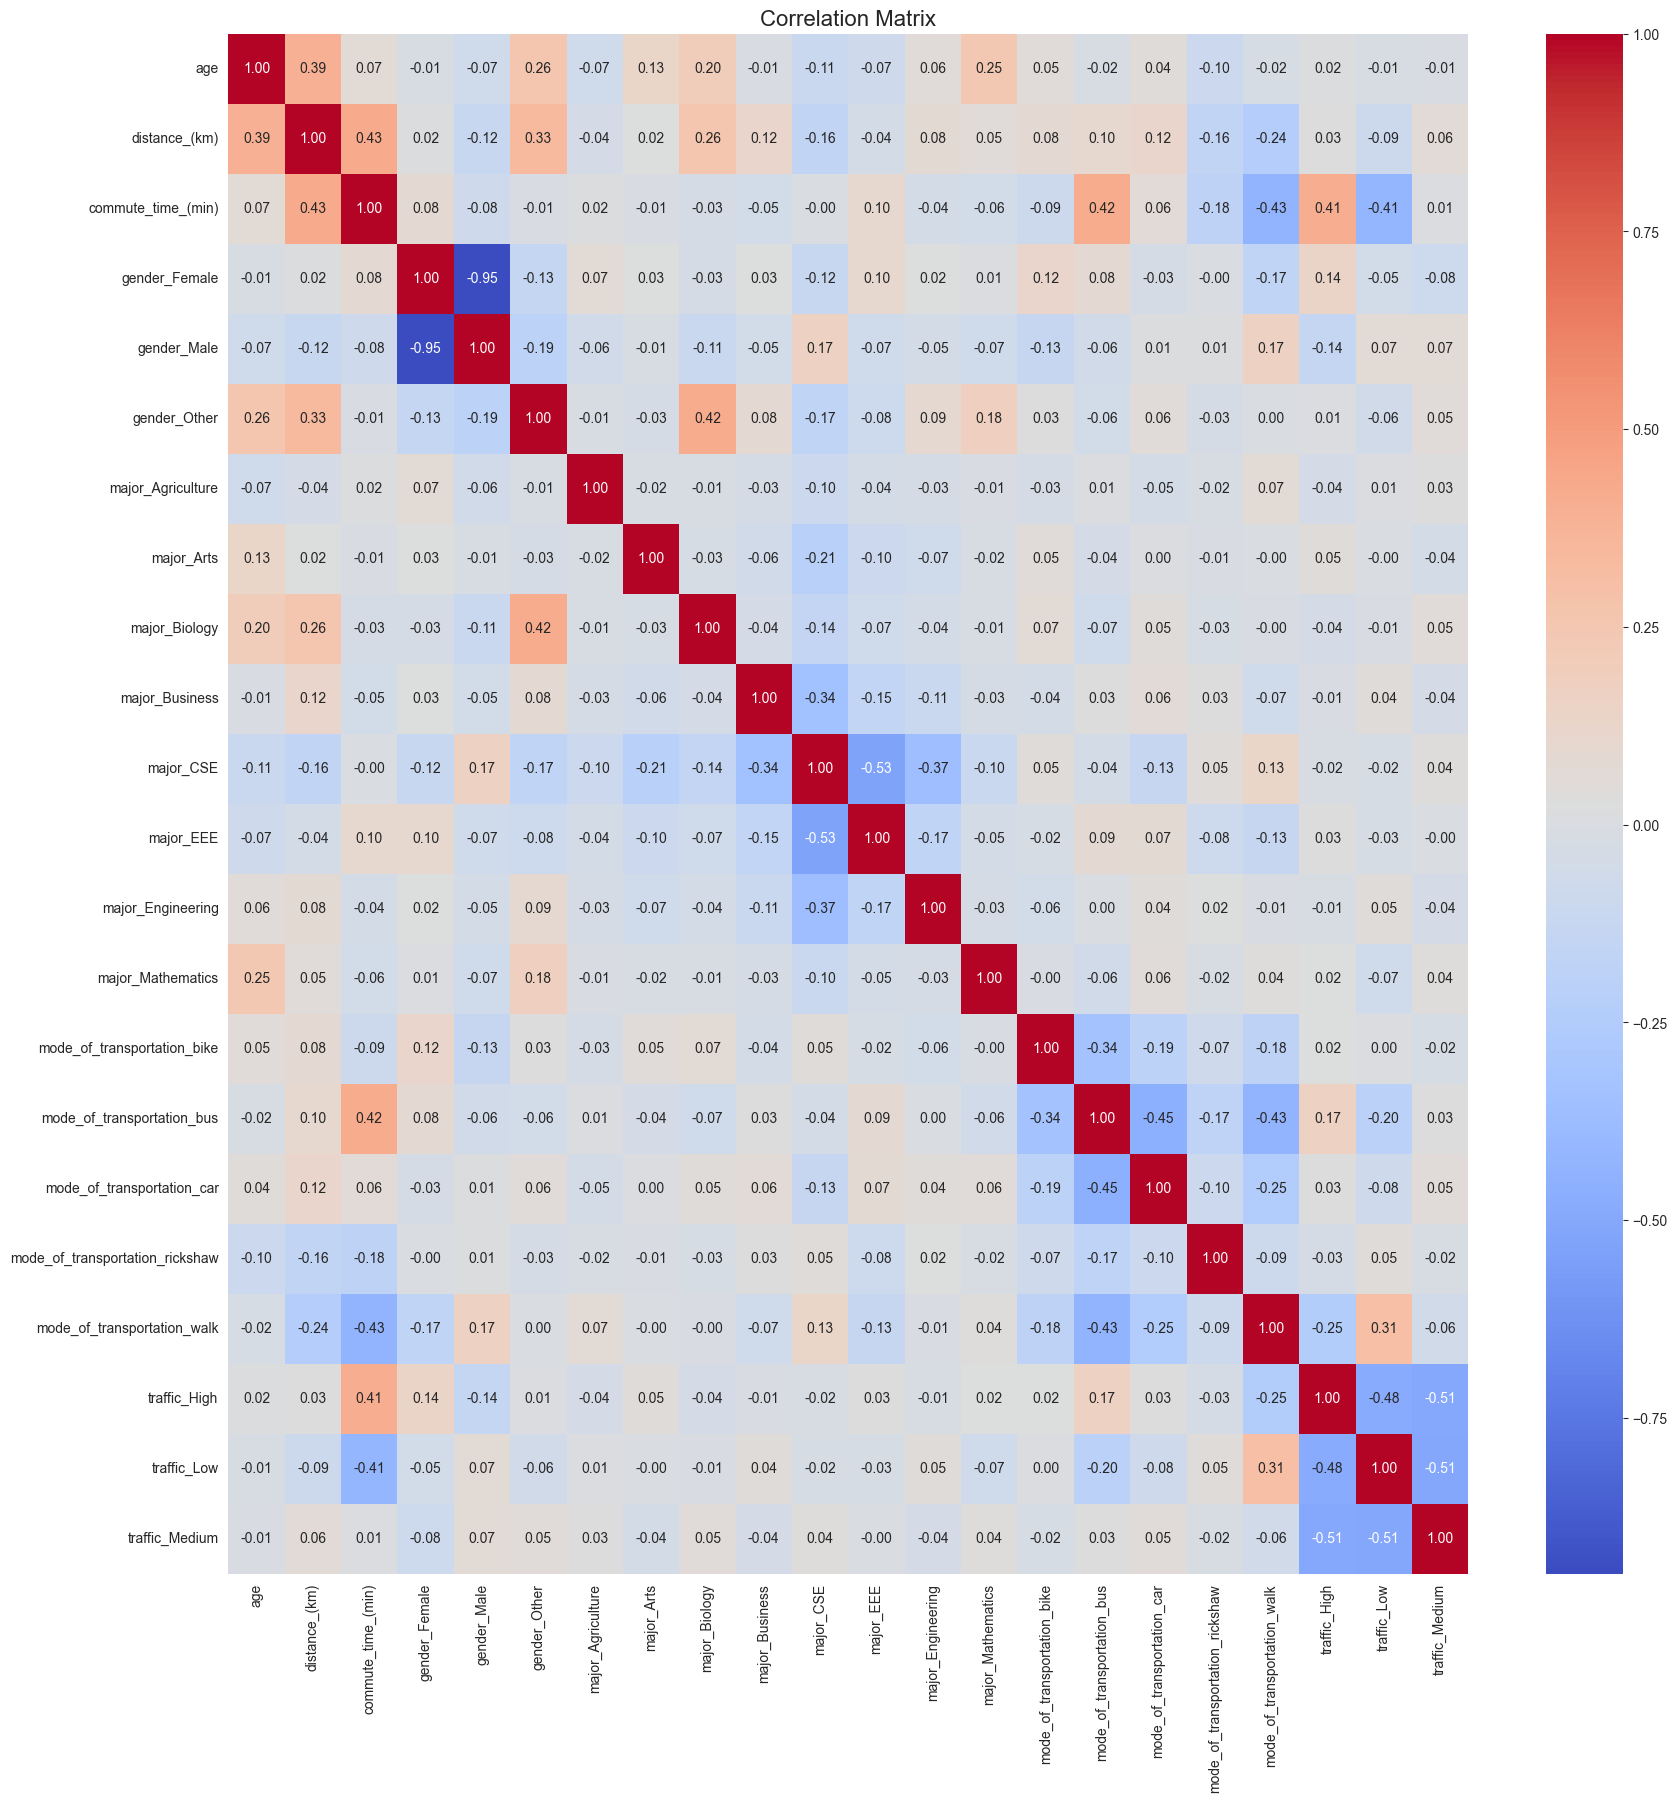

In [74]:
# Encode Categorical Variables
plt.figure(figsize=(20,20))

encoded_df = pd.get_dummies(df, columns=['gender', 'major', 'mode_of_transportation', 'traffic'])

scaler = StandardScaler()
columns_to_scale = ['age', 'distance_(km)']
encoded_df[columns_to_scale] = scaler.fit_transform(encoded_df[columns_to_scale])

sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [75]:
encoded_df.corr()['commute_time_(min)'].sort_values(ascending=False)

commute_time_(min)                 1.000000
distance_(km)                      0.425728
mode_of_transportation_bus         0.419372
traffic_High                       0.407589
major_EEE                          0.096718
gender_Female                      0.081768
age                                0.066023
mode_of_transportation_car         0.063991
major_Agriculture                  0.015138
traffic_Medium                     0.008615
major_CSE                         -0.002939
major_Arts                        -0.007855
gender_Other                      -0.009390
major_Biology                     -0.028097
major_Engineering                 -0.042828
major_Business                    -0.051117
major_Mathematics                 -0.056023
gender_Male                       -0.077925
mode_of_transportation_bike       -0.091160
mode_of_transportation_rickshaw   -0.181499
traffic_Low                       -0.414691
mode_of_transportation_walk       -0.433157
Name: commute_time_(min), dtype:

- Key Correlations Involving commute_time_(min):
  - commute_time_(min) ↔ distance_(km) (0.4257): Good positive correlation: Longer distances directly increase commute time.
  - commute_time_(min) ↔ traffic_High (0.4075):Moderate negative correlation: Commute time tends to increase in high traffic compared to other traffic levels.
  - commute_time_(min) ↔ traffic_Low (-0.414):Moderate negative correlation: Commute time tends to decrease in low traffic compared to other traffic levels.
  - commute_time_(min) ↔ mode_of_transportation_bus (0.4193):Moderate positive correlation: people who take bus have longer commute times.
  - commute_time_(min) ↔ mode_of_transportation_walk (-0.433):Moderate negative correlation: people who walk have shorter commute times, likely due to proximity to campus.
  - commute_time_(min) ↔ mode_of_transportation_rickshaw (-0.181):Weak-to-moderate negative correlation: people using rickshaws also have shorter commute times compared to other modes.
- Multicollinearity: Majors (CSE, EEE, Engineering): negative correlations; they represent mutually exclusive categories. also its true for Gender class.

#### Insights
By carefully observing we can easily say that major_EEE,major_CSE,traffic_Medium,mode_of_transportation_car,major_Engineering,
gender_Male,gender_Female can be dropped for their very low correlation with the commute_time_(min) feature.



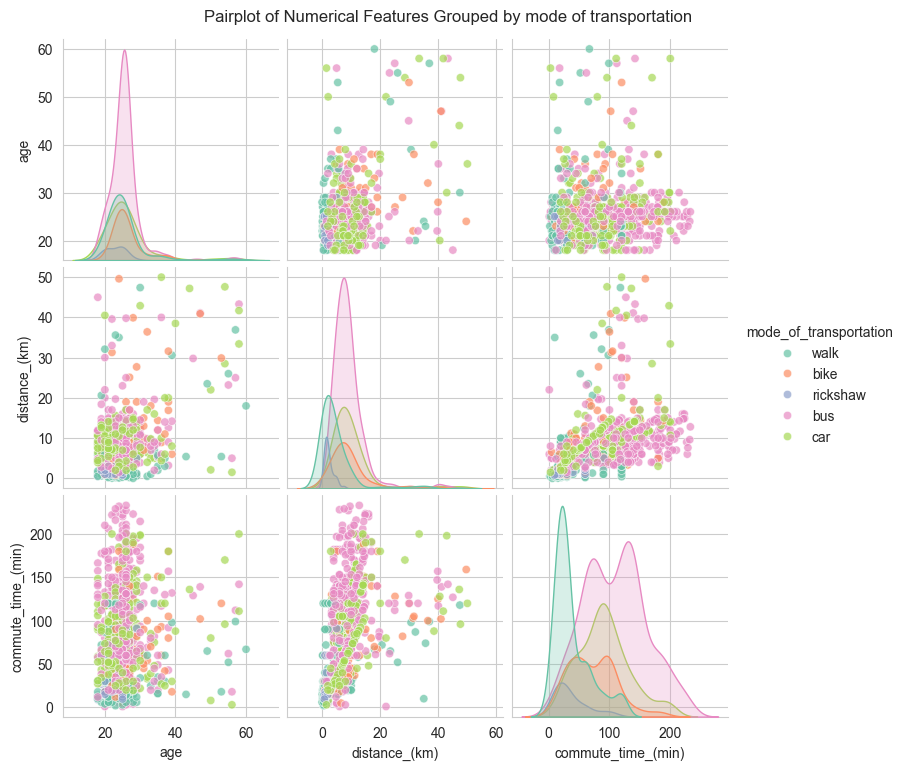

In [76]:
numerical_columns = ['age', 'distance_(km)', 'commute_time_(min)']
sns.pairplot(df, 
             hue='mode_of_transportation', 
             vars=numerical_columns,
             palette='Set2',  
             plot_kws={'alpha': 0.7})

plt.suptitle('Pairplot of Numerical Features Grouped by mode of transportation', y=1.02)
plt.show()


It is more clear that distance is the factor which can be used to to separate commute time based upon on the mode of transportation. i.e. distance and mode of transportation are related and they also relate to the commute time.

# Summary of Findings and Analysis Insights

## Univariate Analysis

* **Age Distribution:**
    - The age range is between 15 and 64, with the majority (503) in the 25-29 age group.
    - The lowest count (2) is in the 60-64 group, and other age groups have between 4 and 49 individuals.
* **Gender Distribution:**
    - Males make up 61.6% of the dataset, while females are in the minority.
    - The "Other" gender category has the least representation.
* **Major Distribution:**
    - CSE is the most common major (562 people), followed by EEE (202 people).
    - Agriculture has the least representation with only 10 individuals.
* **Distance from Office:**
    - Most people live 0-12 km from their office, with the largest group (396) in the 2.5-7.4 km range.
    - Few individuals live 47.5-52.4 km away.
* **Mode of Transportation:**
    - The majority of people use the bus (461), followed by cars (208).
    - Rickshaw users are the smallest group (40).
* **Traffic Conditions:**
    - Traffic conditions are nearly balanced across all classes (low, medium, high).
* **Commute Time:**
    - Most people commute between 0-250 minutes, with the largest group (164) taking 20-39.9 minutes.

## Bivariate Analysis

* **Traffic vs Commute Time:**
    - Higher traffic correlates with longer commute times, while low traffic results in shorter commute times. However, some exceptions exist.
* **Commute Time by Mode of Transportation:**
    - Bus users have the highest median commute time (115.5 minutes), followed by car users (90 minutes).
    - Rickshaw and walking users have the lowest commute times, around 30 minutes.
* **Commute Time by Traffic Condition:**
    - High traffic results in the longest commute times (120 minutes), followed by medium (82.8 minutes) and low traffic (45.7 minutes).

## Multivariate Analysis

* **Gender and Commute Time w.r.t major:**
    - Females tend to have longer commute times than males, particularly in EEE and Engineering majors.
    - However, Mathematics majors show no significant difference.
* **Mode of Transport and Traffic Impact w.r.t commute_time:**
    - People using buses and cars generally experience higher total commute times than those using rickshaws or walking.
    - Bus users consistently have the highest total commute time, while rickshaw users have the least.
* **Commute Time Correlations:**
    - Commute time is positively correlated with distance (0.43), bus usage (0.42), and high traffic (0.41).
    - It is negatively correlated with low traffic (-0.41), walking (-0.43), and rickshaw (-0.18).
    - Gender and major have low to moderate correlations with commute time, with females (0.08) and EEE major (0.10) showing weak positive correlations.

# Regression Analysis

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [78]:
features = ['distance_(km)','traffic_High', 'mode_of_transportation_bus', 'age','mode_of_transportation_rickshaw',
'traffic_Low','mode_of_transportation_walk']
target = 'commute_time_(min)'

X = encoded_df.drop(target, axis=1)
X_selected_features= encoded_df[features]
y = encoded_df[target]

In [79]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
def regression_analysis(X_train, X_test, y_train, y_test, models):
    results = []
    coefficients = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Model": model_name,
            "MSE": mse,
            "RMSE" : np.sqrt(mse),
            "MAE": mae,
            "R2": r2
        })

        if hasattr(model, "coef_"):
            coefficients[model_name] = dict(zip(X_train.columns, model.coef_))

    return results, coefficients

In [81]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression alpha=0.01": Ridge(alpha=0.01),
    "Ridge Regression alpha=0.1": Ridge(alpha=0.1),
    "Ridge Regression alpha=0.5": Ridge(alpha=0.5),
    "Ridge Regression alpha=1.0": Ridge(alpha=1.0),
    "Ridge Regression alpha=10": Ridge(alpha=10),
    "Lasso Regression alpha=0.01": Lasso(alpha=0.01),
    "Lasso Regression alpha=0.1": Lasso(alpha=0.1),
    "Lasso Regression alpha=0.5": Lasso(alpha=0.5),
    "Lasso Regression alpha=1.0": Lasso(alpha=1.0),
    "Lasso Regression alpha=10": Lasso(alpha=10),
    "ElasticNet Regression alpha=0.01": ElasticNet(alpha=0.01,l1_ratio=0.5),
    "ElasticNet Regression alpha=0.1": ElasticNet(alpha=0.1,l1_ratio=0.5),
    "ElasticNet Regression alpha=0.5": ElasticNet(alpha=0.5,l1_ratio=0.5),
    "ElasticNet Regression alpha=1.0": ElasticNet(alpha=1.0,l1_ratio=0.5),
    "ElasticNet Regression alpha=10.0": ElasticNet(alpha=10.0,l1_ratio=0.5)
}
results, coefficients = regression_analysis(X_train, X_test, y_train, y_test, models)


In [82]:
for result in results:
    print(f"{result['Model']} Metrics:\n  MSE: {result['MSE']:.2f}\n  MAE: {result['MAE']:.2f}\n  R2: {result['R2']:.2f}\n")


Linear Regression Metrics:
  MSE: 1299.18
  MAE: 27.05
  R2: 0.52

Ridge Regression alpha=0.01 Metrics:
  MSE: 1299.24
  MAE: 27.05
  R2: 0.52

Ridge Regression alpha=0.1 Metrics:
  MSE: 1299.75
  MAE: 27.05
  R2: 0.52

Ridge Regression alpha=0.5 Metrics:
  MSE: 1301.77
  MAE: 27.06
  R2: 0.52

Ridge Regression alpha=1.0 Metrics:
  MSE: 1303.79
  MAE: 27.06
  R2: 0.51

Ridge Regression alpha=10 Metrics:
  MSE: 1310.56
  MAE: 27.31
  R2: 0.51

Lasso Regression alpha=0.01 Metrics:
  MSE: 1301.78
  MAE: 27.06
  R2: 0.52

Lasso Regression alpha=0.1 Metrics:
  MSE: 1329.25
  MAE: 27.47
  R2: 0.51

Lasso Regression alpha=0.5 Metrics:
  MSE: 1338.80
  MAE: 27.88
  R2: 0.50

Lasso Regression alpha=1.0 Metrics:
  MSE: 1368.56
  MAE: 28.89
  R2: 0.49

Lasso Regression alpha=10 Metrics:
  MSE: 2184.97
  MAE: 39.45
  R2: 0.19

ElasticNet Regression alpha=0.01 Metrics:
  MSE: 1309.98
  MAE: 27.21
  R2: 0.51

ElasticNet Regression alpha=0.1 Metrics:
  MSE: 1322.62
  MAE: 27.95
  R2: 0.51

ElasticNet

In [83]:
for model_name, coeffs in coefficients.items():
    print(f"{model_name} Coefficients:")
    for feature, value in coeffs.items():
        print(f"  {feature}: {value:.4f}")

Linear Regression Coefficients:
  age: -1.5617
  distance_(km): 21.3011
  gender_Female: 8.8401
  gender_Male: 8.8166
  gender_Other: -17.6567
  major_Agriculture: 19.2166
  major_Arts: 5.6306
  major_Biology: -21.6281
  major_Business: -8.1590
  major_CSE: 14.7115
  major_EEE: 14.7555
  major_Engineering: -2.2564
  major_Mathematics: -22.2708
  mode_of_transportation_bike: -7.4721
  mode_of_transportation_bus: 29.3750
  mode_of_transportation_car: 11.7971
  mode_of_transportation_rickshaw: -18.8345
  mode_of_transportation_walk: -14.8655
  traffic_High: 23.7589
  traffic_Low: -20.6916
  traffic_Medium: -3.0673
Ridge Regression alpha=0.01 Coefficients:
  age: -1.5629
  distance_(km): 21.3005
  gender_Female: 8.8395
  gender_Male: 8.8163
  gender_Other: -17.6557
  major_Agriculture: 19.1527
  major_Arts: 5.6316
  major_Biology: -21.6083
  major_Business: -8.1552
  major_CSE: 14.7129
  major_EEE: 14.7568
  major_Engineering: -2.2537
  major_Mathematics: -22.2367
  mode_of_transportation_

###  Random Forest Regressor

In [84]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
print(f"Random Forest Regressor MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Random Forest Regressor MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Random Forest Regressor R2: {r2_score(y_test, y_pred):.2f}")

Random Forest Regressor MSE: 1015.25
Random Forest Regressor MAE: 21.82
Random Forest Regressor R2: 0.62


In [85]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 1001.7953033927637
R² Score: 0.6270670858828147


### Linear Regression and Random Forest With Selected Features

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2, random_state=42)

In [87]:
linear_regression_selected_features=LinearRegression()
linear_regression_selected_features.fit(X_train, y_train)
y_pred = linear_regression_selected_features.predict(X_test)
print(f"Linear Regression With Selected Features MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Linear Regression With Selected Features MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Linear Regression With Selected Features R2: {r2_score(y_test, y_pred):.2f}")

Linear Regression With Selected Features MSE: 1374.00
Linear Regression With Selected Features MAE: 28.94
Linear Regression With Selected Features R2: 0.49


In [88]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 979.8844729965676
R² Score: 0.6352237120944841


### Regression Model Comparison and Analysis

**Linear Regression**

* **Metrics:**
    * Mean Squared Error (MSE): 1299.18
    * Mean Absolute Error (MAE): 27.05
    * R² Score: 0.52
* Linear regression provided moderate performance in this dataset, with an R² of 0.52 indicating it explains about half of the variance in the target variable. This suggests the relationships in the data may be more complex or noisy compared to the previous analysis.

**Ridge Regression**

* **Performance Across Different Alphas:**
    - As alpha increased, MSE and MAE slightly degraded while R² remained relatively stable until higher alpha values.
        - For example:
            - At alpha = 0.01: MSE = 1299.24, R² = 0.52
            - At alpha = 10: MSE = 1310.56, R² = 0.51
* **Reason for Performance Stability:**
    - Ridge regression showed remarkable stability across different alpha values, with only minimal degradation in performance.
    - This suggests that multicollinearity might not be a major issue in the dataset, and the features have relatively balanced importance.

**Lasso Regression**

* **Performance Across Different Alphas:**
    - Lasso showed more sensitivity to alpha values compared to Ridge regression.
        - For example:
            - At alpha = 0.01: MSE = 1301.78, R² = 0.52
            - At alpha = 10: MSE = 2184.97, R² = 0.19
* **Reason for Rapid Degradation:**
    - Lasso regression's performance deteriorated significantly with higher alpha values.
    - The dramatic drop in R² from 0.52 to 0.19 indicates that important features were completely eliminated by the L1 regularization.
    - This suggests that many features contribute meaningful information to the predictions, and aggressive feature selection is detrimental.

**Random Forest Regressor**

* **Metrics:**
    * MSE: 1015.25
    * MAE: 21.82
    * R²: 0.62
* **Reasons for Superior Performance:**
    - The higher R² score suggests that there are non-linear relationships in the data that Random Forest captures better than linear models.
    - The optimized hyperparameters (max_depth: 10, min_samples_leaf: 2, min_samples_split: 10, n_estimators: 50) indicate a balanced model that avoids overfitting while capturing complex patterns.

**Linear Regression with Selected Features**

* **Metrics:**
    * MSE: 1015
    * MAE: 21.90
    * R²: 0.49
**Random Forest Regressor with selected features**
Random Forest performed notably better than the linear models in this dataset.
* **Metrics:**
    * MSE: 979.88
    * MAE: 31.3
    * R²: 0.63
Overall we can say that the relationships in the dataset can be described more non-linerly than the linear manner.



